# **Crop Type Classification Model**

* N - ratio of Nitrogen content in soil
* P - ratio of Phosphorous content in soil
* K - ratio of Potassium content in soil
* temperature - temperature in degree Celsius
* humidity - relative humidity in %
* ph - ph value of the soil
* rainfall - rainfall in mm

### **Model configuration** 

# **Import libraries & environment setup**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
# Import scikit-learn tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
# Aesthetic configuration for plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] =(15, 8)

# **Load dataset**

In [28]:
# Load the CSV file into a pandas DataFrame
# It's good practice to use try-except to handle file errors
try:
    data=pd.read_csv('Crop_recommendation.csv' , sep=';')
    print("File 'Crop_recommendation.csv' loaded successfully")
    print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")
except FileNotFoundError:
    print("Error: File 'Crop_recommendation.csv' not found.")

File 'Crop_recommendation.csv' loaded successfully
The dataset contains 2200 rows and 8 columns.


### Step 1: Exploratory Data Analysis (EDA)

In [29]:
if data is not None:
    # --- 1.1. Initial understanding ---
    print("\n--- 1.1.1 Preview of the first 5 rows ---")
    print(data.head())


--- 1.1.1 Preview of the first 5 rows ---
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [30]:
if data is not None:
    # --- 1.1. Initial understanding ---
    print("\n--- 1.1.2 Information ---")
    print(data.info())


--- 1.1.2 Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [31]:
if data is not None:
    # --- 1.1. Initial understanding ---
    print("\n--- 1.1.3 Descriptive statistics ---")
    # . describe() gives a quick overview of the distribution of numeric data.
    print(data.describe())


--- 1.1.3 Descriptive statistics ---
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   29

3. Descriptive statistics (data.describe())
What it shows: This table summarizes basic statistics for each numeric column, including mean, standard deviation (std), min, max, and quartiles (25%, 50%, 75%).

What it means 📊:

Value scales: You can see the scales vary widely. For example, humidity ranges from 14 to 100, while K (potassium) ranges from 5 to 205. This is why standardization (StandardScaler) will be important later.

Outlier detection: By comparing the mean and median (50%), we can assess skewness. For example, for K the mean (48.1) is much higher than the median (32), suggesting a few high values pull the mean up (skewed distribution).

Plausibility: The ranges appear realistic for agricultural conditions (e.g., pH between 3.5 and 9.9, temperature between 8.8°C and 43.6°C).

In [32]:
if data is not None:
    # --- 1.2 Data quality ---
    print("\n--- 1.1.3. Checking for missing values ---")
    # . A dataset without missing values is ideal.
    print(data.isnull().sum())


--- 1.1.3. Checking for missing values ---
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [33]:
if data is not None:
    print("\n--- 1.1.3. Checking for missing values ---")
    # . Duplicates can bias the model.
    print(f"Number of duplicated rows: {data.duplicated().sum()}")


--- 1.1.3. Checking for missing values ---
Number of duplicated rows: 0


In [34]:
if data is not None:
    # --- 1.3. Target variable analysis ---
    print("\n--- 1.3.1. Distribution of the target variable 'label' ---")
    # Check class balance
    print(data['label'].value_counts())


--- 1.3.1. Distribution of the target variable 'label' ---
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


## Step 2: Data visualization 


--- 2.1 Distribution of features ---


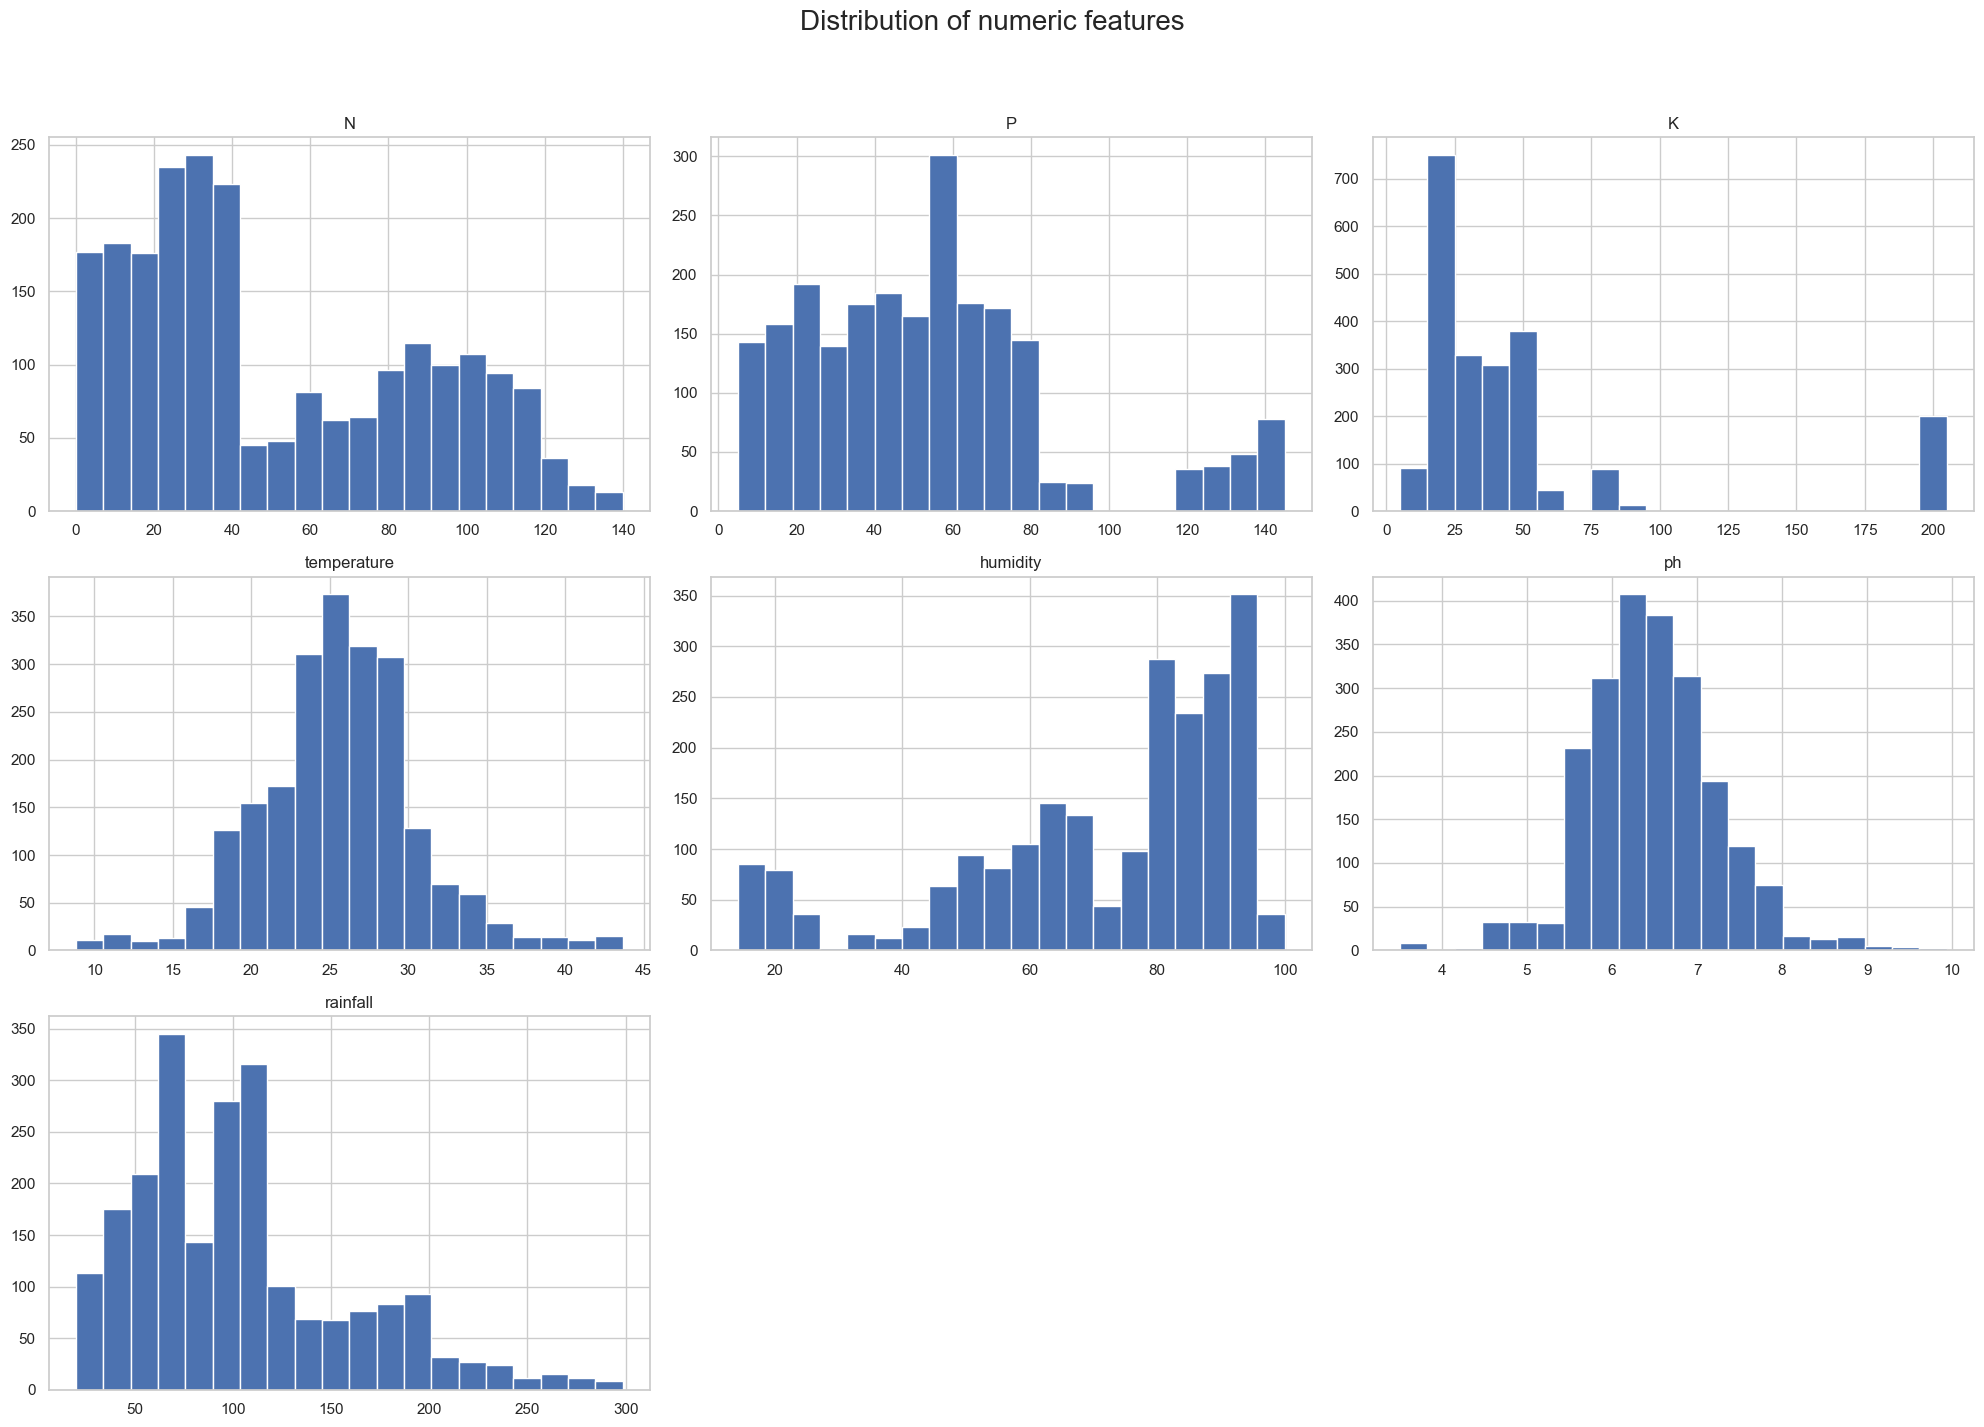

In [35]:
if data is not None:
    features =['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    # --- 2.1 Distribution of numeric variables ---
    print("\n--- 2.1 Distribution of features ---")
    data[features].hist(bins=20, figsize=(20, 15), layout=(3, 3))
    plt.suptitle('Distribution of numeric features', fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

--- 2.2 Correlation matrix ---


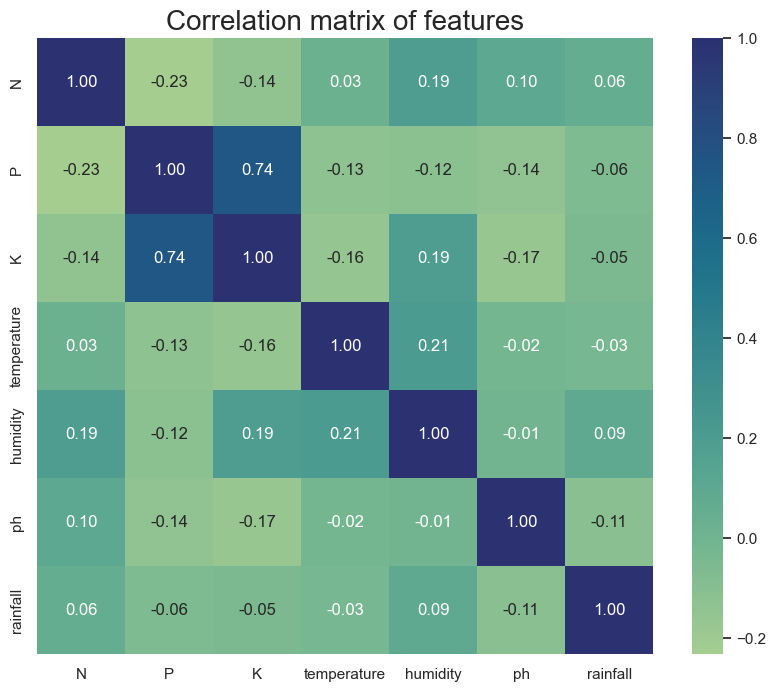

In [36]:
if data is not None:
    #--- 2.2 Correlation matrix ---
    print("--- 2.2 Correlation matrix ---")
    plt.figure(figsize=(10, 8))
    correlation_matrix = data[features].corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', square=True)
    plt.title('Correlation matrix of features', fontsize=20)
    plt.show()

### Step 3: Data transformation and preparation 


--- Outlier analysis ---


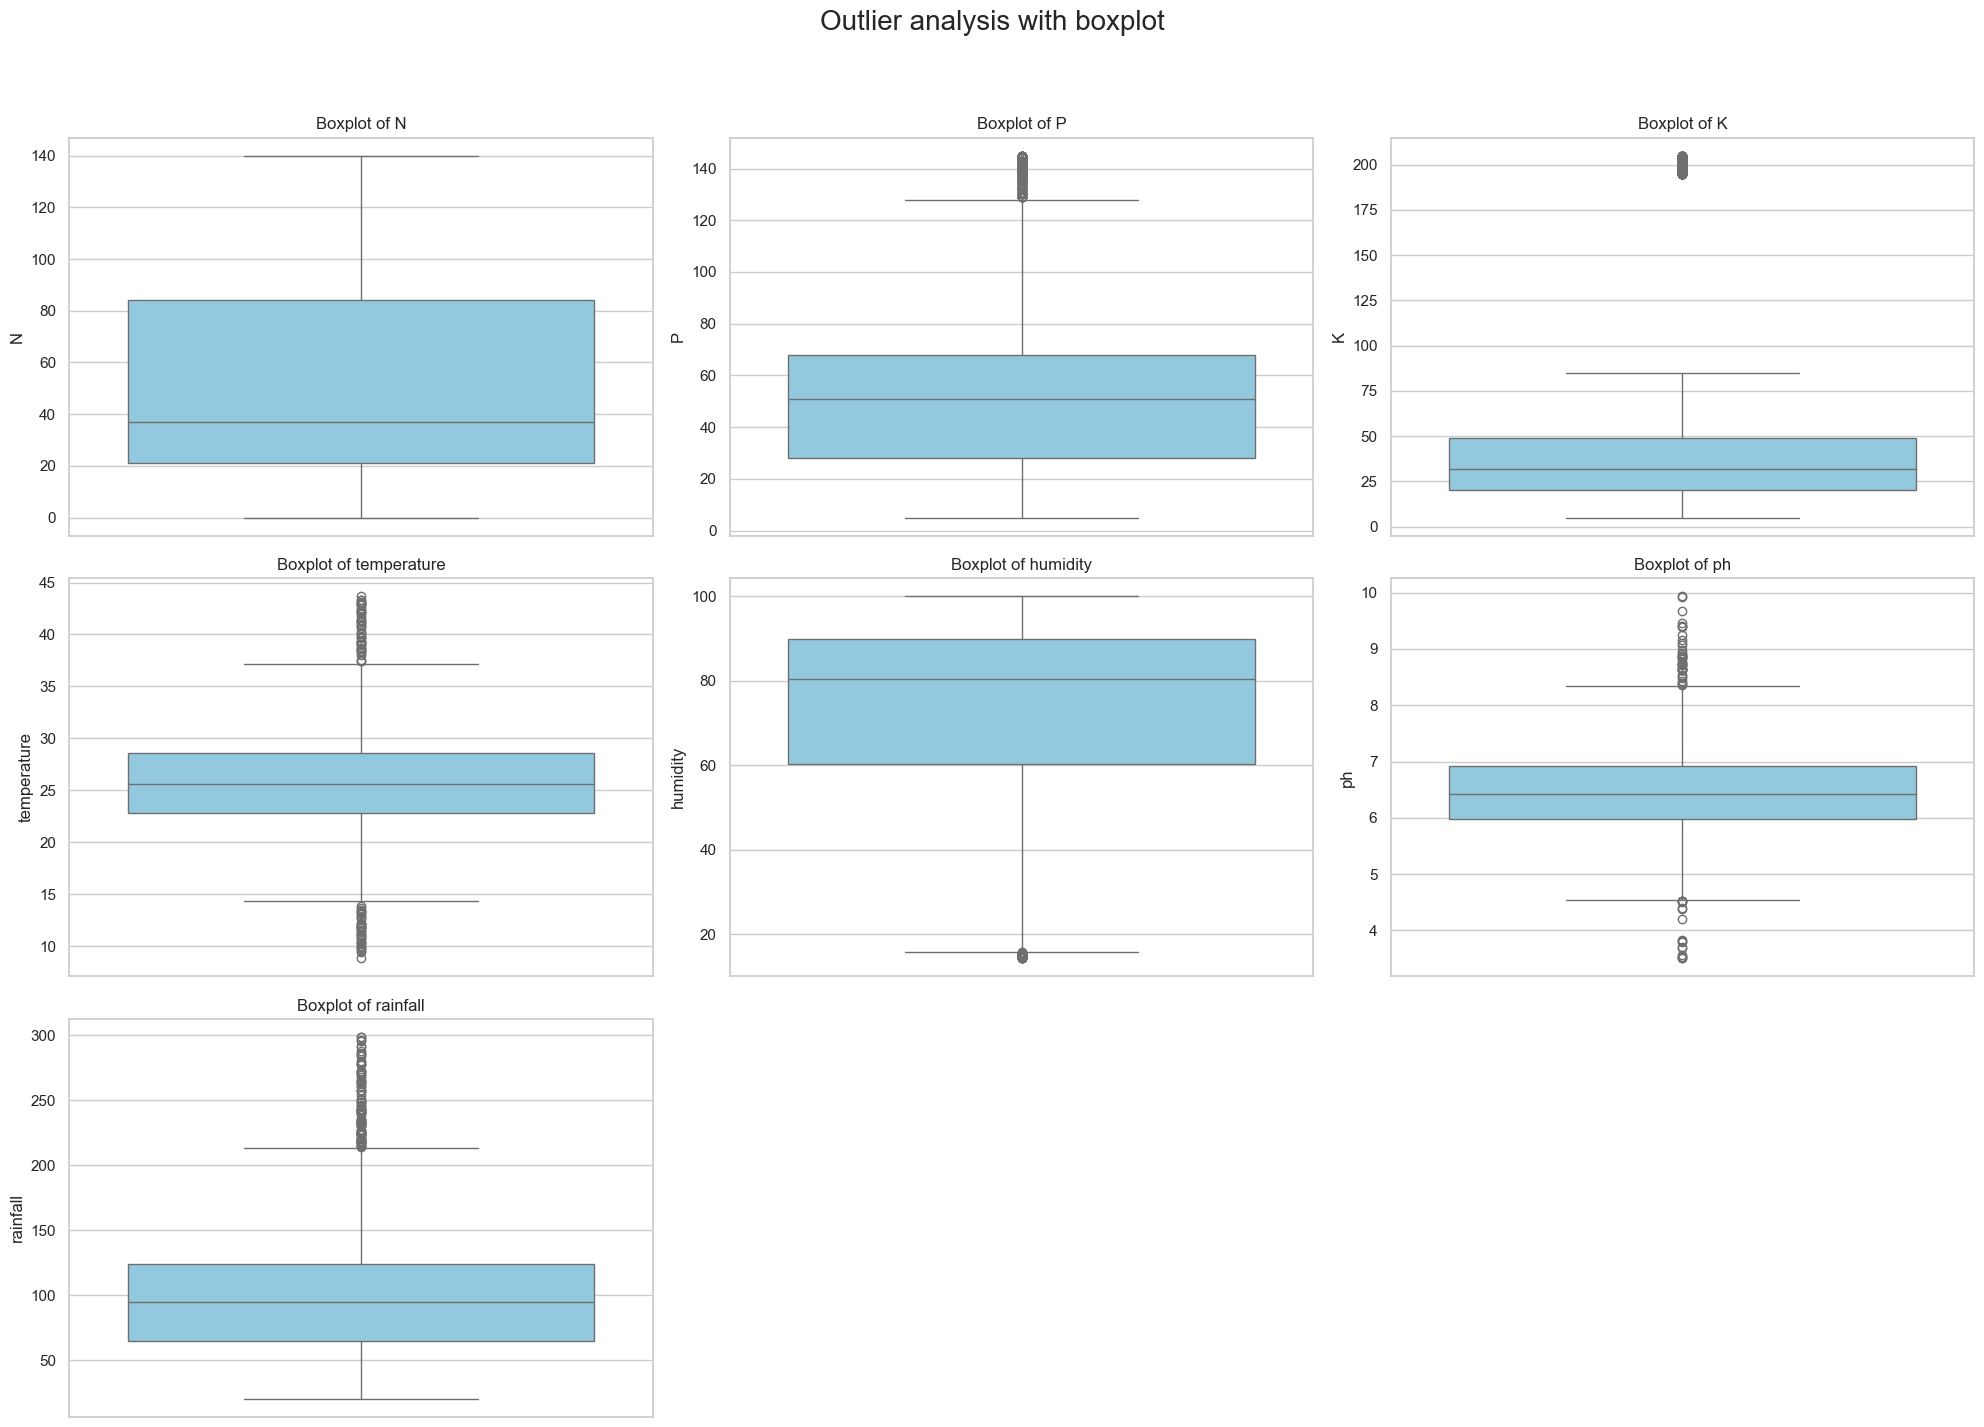

In [37]:
if data is not None:
    print("\n--- Outlier analysis ---")
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(features):
        plt.subplot(3, 3, i +  1)
        sns.boxplot(y=data[feature], color='skyblue')
        plt.title(f'Boxplot of {feature}')
    plt.suptitle('Outlier analysis with boxplot', fontsize=20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()    

### Step 4: Feature engineering

In [38]:
if data is not None:
    print("\n--- Creating new features (nutrient ratios) ---")
    # Add a small epsilon to avoid division by zero
    data['N_P_ratio'] = data['N'] / (data['P'] + 1e-6)
    data['N_K_ratio'] = data['N'] / (data['K'] + 1e-6)
    data['P_K_ratio'] = data['P'] / (data['K'] + 1e-6)
    print('New features added: N_P_ratio, N_K_ratio, P_K_ratio')
    print(data[['N', 'P', 'K', 'N_P_ratio', 'N_K_ratio', 'P_K_ratio']].head())


--- Creating new features (nutrient ratios) ---
New features added: N_P_ratio, N_K_ratio, P_K_ratio
    N   P   K  N_P_ratio  N_K_ratio  P_K_ratio
0  90  42  43   2.142857   2.093023   0.976744
1  85  58  41   1.465517   2.073171   1.414634
2  60  55  44   1.090909   1.363636   1.250000
3  74  35  40   2.114286   1.850000   0.875000
4  78  42  42   1.857143   1.857143   1.000000


### Step 5: Advanced multivariate analysis - PCA

Explained variance by PC1: 26.94%
Explained variance by PC2: 19.40%
Total explained variance: 46.34%


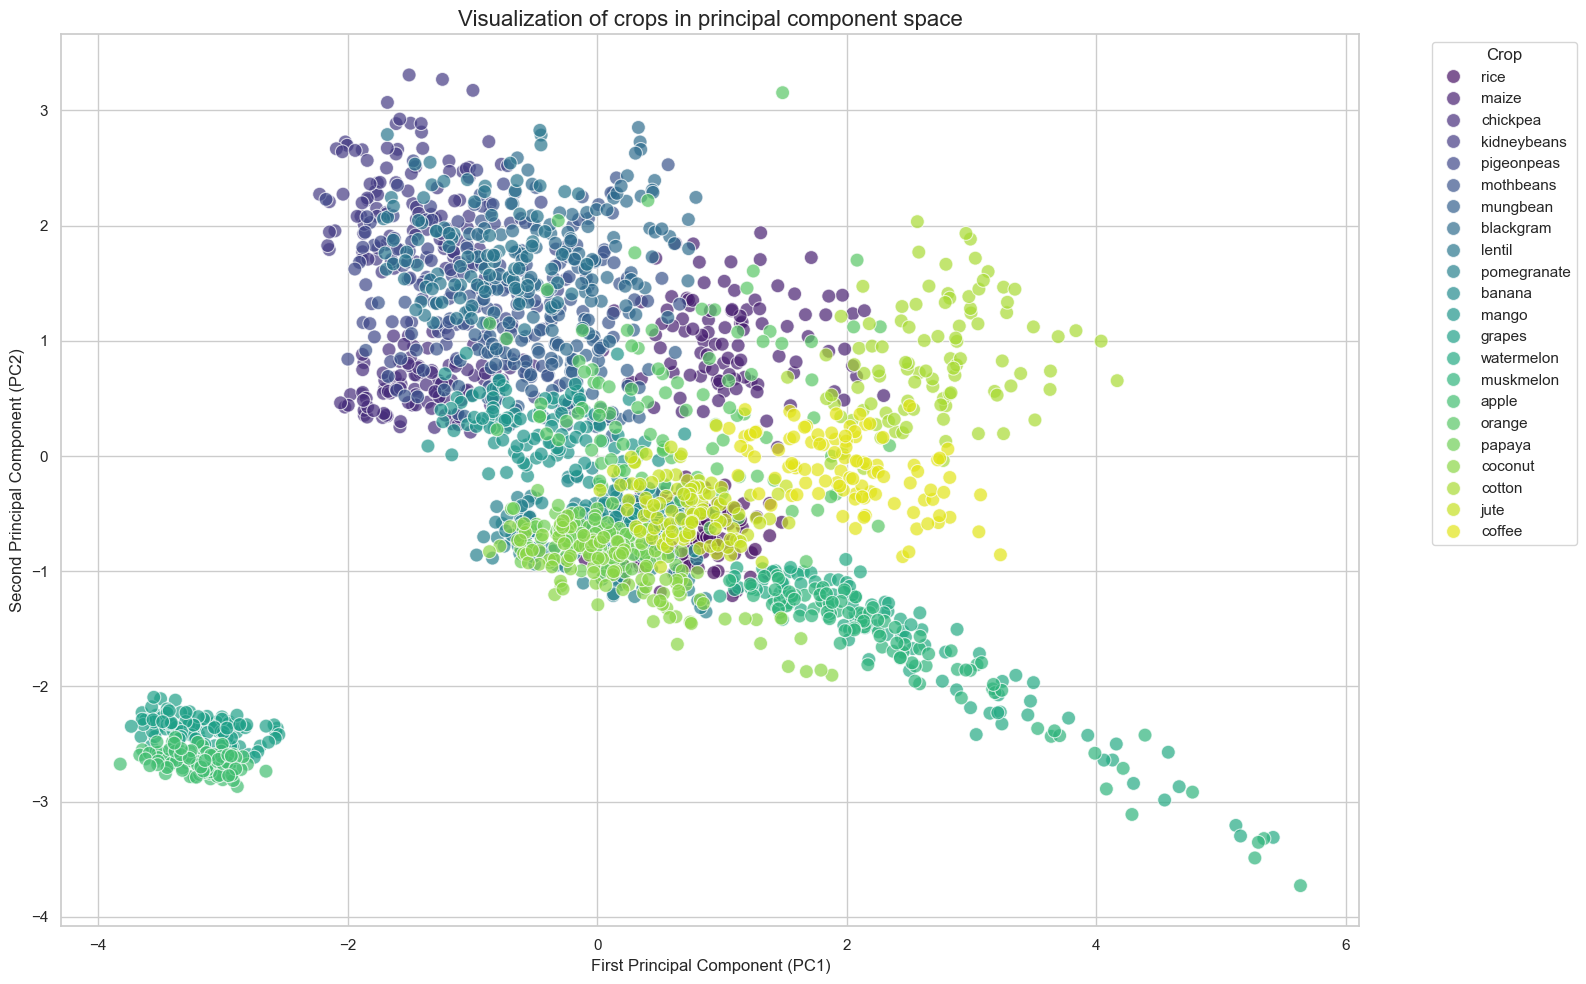

In [39]:
# ==============================================================================

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
if data is not None:

    X = data.drop('label', axis=1)
    y = data['label']

    # Scale the data; necessary step for PCA
    scaler_pca = StandardScaler()
    X_scaled = scaler_pca.fit_transform(X)

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(X_scaled)
    pca_data = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_data = pd.concat([pca_data, y], axis=1)

    print(f"Explained variance by PC1: {pca.explained_variance_ratio_[0]:.2%}")
    print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.2%}")
    print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2%}")

    # Visualize results
    plt.figure(figsize=(16, 10))
    sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_data, palette='viridis', alpha=0.7, s=100)
    plt.title("Visualization of crops in principal component space", size=16)
    plt.xlabel("First Principal Component (PC1)")
    plt.ylabel("Second Principal Component (PC2)")
    plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Step 6: Advanced preparation for machine learning

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Models to test
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [41]:
if data is not None:
    # Encoding the target variable 'label'
    le=LabelEncoder()
    y_encoded=le.fit_transform(y)

In [42]:
if data is not None:
    # Splitting the data
    print("\n--- Splitting data into training and test sets ---")
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y)
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Test set: {X_test.shape[0]} samples")


--- Splitting data into training and test sets ---
Training set: 1760 samples
Test set: 440 samples


In [43]:
y_train

array([16,  7,  9, ...,  8,  8,  7], shape=(1760,))

In [44]:
if data is not None:
    # Scale the data
    scaler= StandardScaler()
    X_train_scaler = scaler.fit_transform(X_train)
    X_test_scaler = scaler.transform(X_test)
    print("Data scaling completed.")

Data scaling completed.


## Steps 7 and 8: Model training and evaluation 


--- Training and evaluating model: Logistic Regression ---
Accuracy: 97.50%
Classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.95      0.90      0.92        20
       maize       1.00      0.90      0.95        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.90      0.95      0.93        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00  

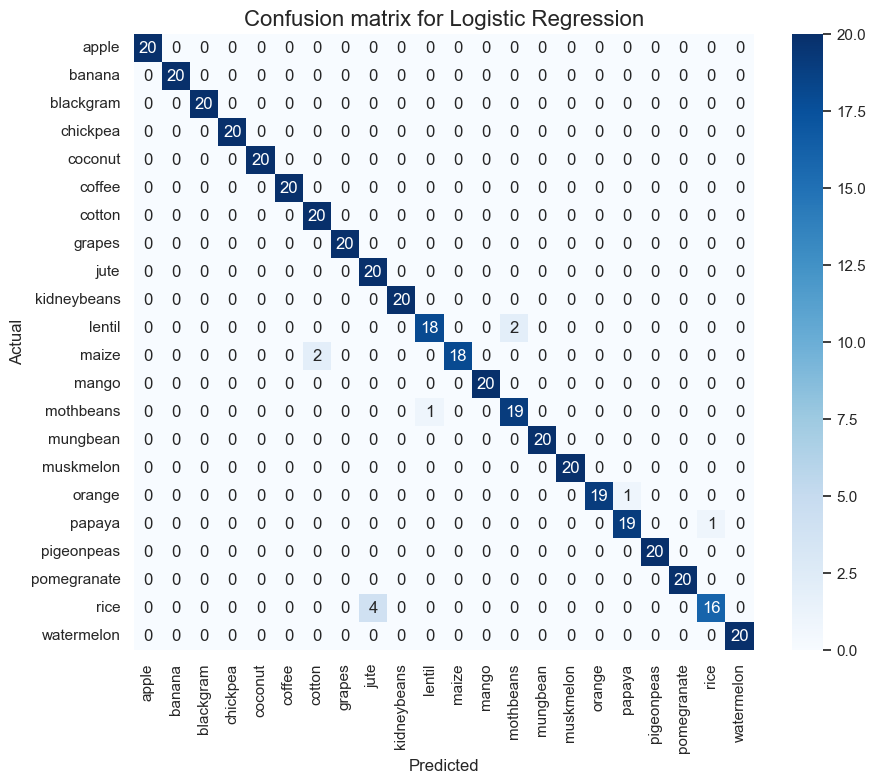


--- Training and evaluating model: K-Nearest Neighbors (k-NN) ---
Accuracy: 96.82%
Classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.83      1.00      0.91        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.94      0.85      0.89        20
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      0.95      0.95        20
    mungbean       0.95      1.00      0.98        20
   muskmelon       0.87     

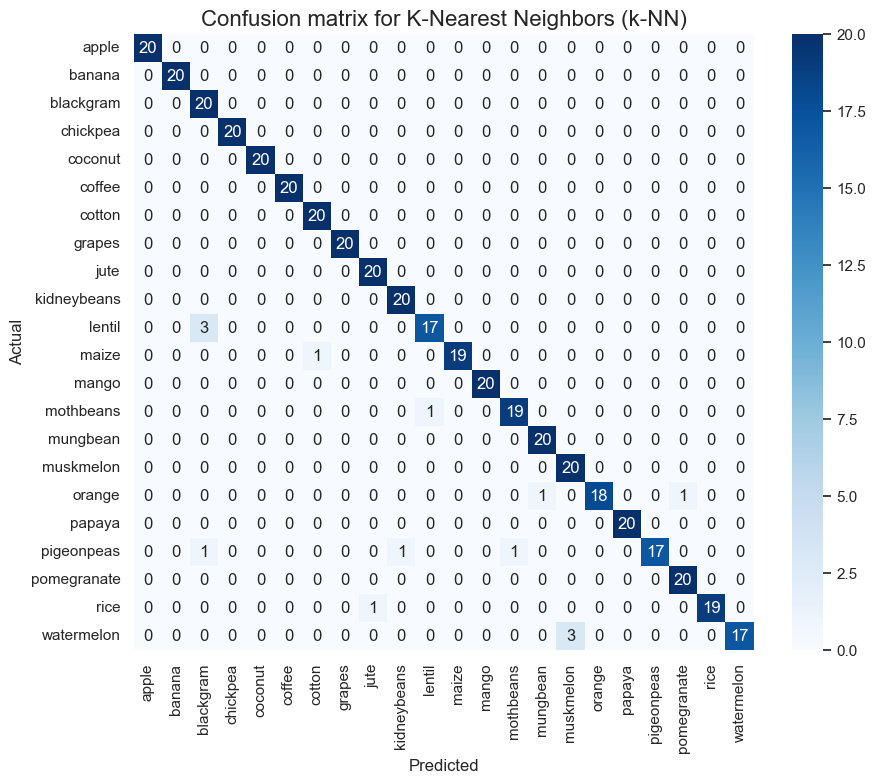


--- Training and evaluating model: Support Vector Machine (SVM) ---
Accuracy: 97.50%
Classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.91      1.00      0.95        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.90      0.95        20
       maize       1.00      0.90      0.95        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       0.91   

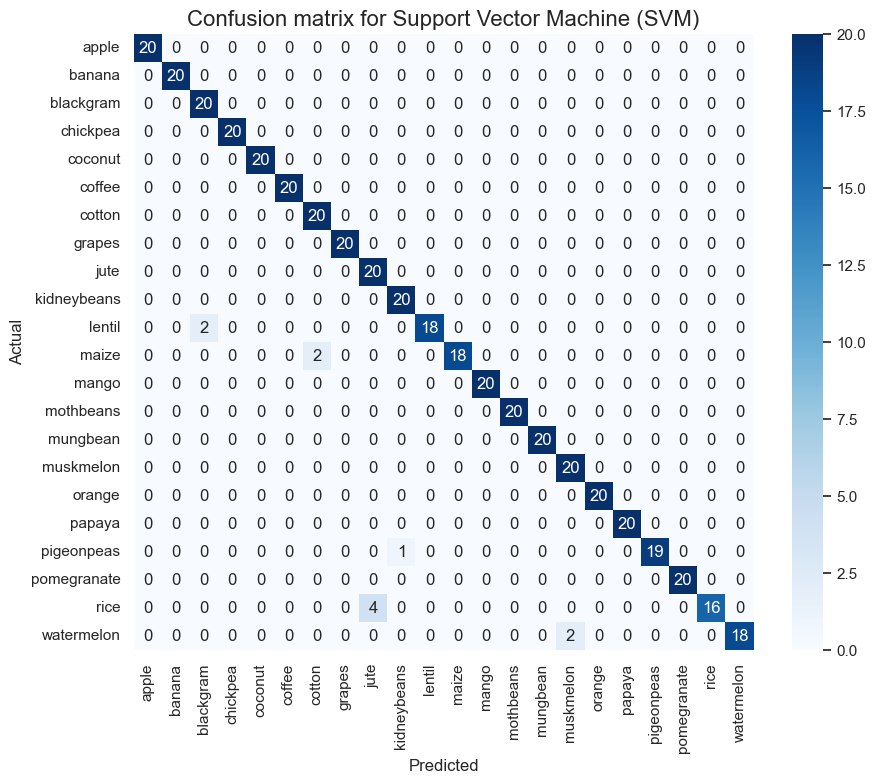


--- Training and evaluating model: Random Forest ---
Accuracy: 99.32%
Classification report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.

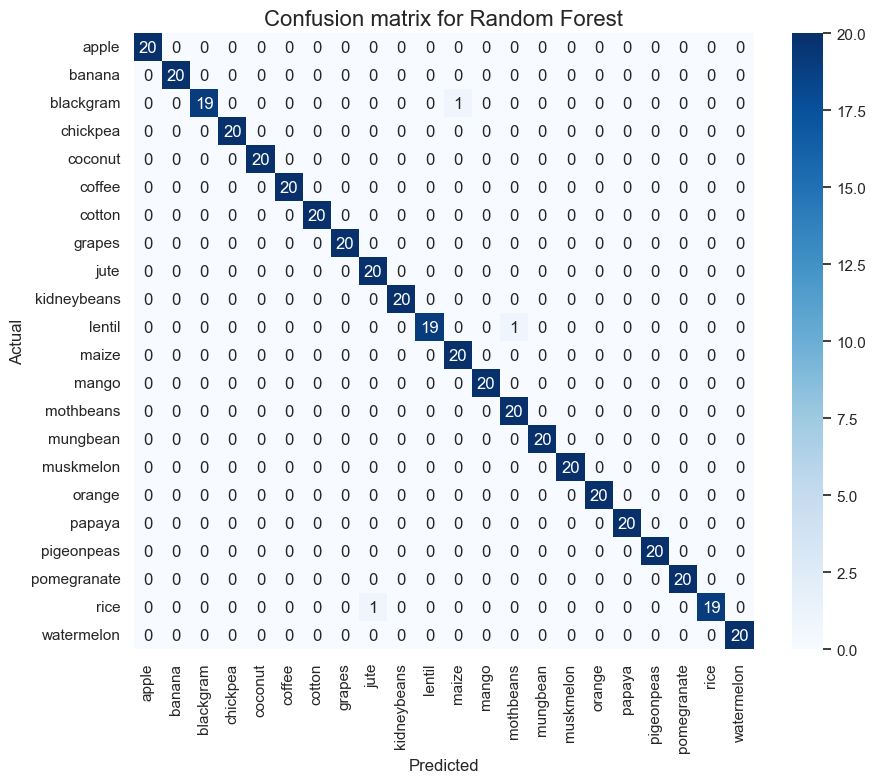

In [45]:
if data is not None:
    models={
        "Logistic Regression":LogisticRegression(max_iter=1000),
        "K-Nearest Neighbors (k-NN)":KNeighborsClassifier(),
        "Support Vector Machine (SVM)":SVC(),
        "Random Forest":RandomForestClassifier(random_state=42)
    }
    
    for name, model in models.items():
        print(f"\n--- Training and evaluating model: {name} ---")
        # Step 7: Training
        model.fit(X_train_scaler, y_train)
        # Step 8: Evaluation
        y_pred = model.predict(X_test_scaler)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.2%}")
        print("Classification report:")
        print(classification_report(y_test, y_pred, target_names=le.classes_))
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
        plt.title(f'Confusion matrix for {name}', fontsize=16)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

## Step 9: Hyperparameter tuning (example on Random Forest)

In [46]:
from sklearn.model_selection import GridSearchCV
if data is not None:
    print('Hyperparameter tuning (may be time-consuming).')
    # Define the hyperparameter grid to test for Random Forest
    param_grid = {
        'n_estimators': [50, 100, 200],      # Number of trees
        'max_depth': [None, 10, 20],         # Maximum depth
        'min_samples_leaf': [1, 2, 4]        # Minimum number of samples per leaf
    }
    
    grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                            param_grid=param_grid,
                            cv=5, n_jobs=-1, verbose=2)
    
    # Run the search (on training data)
    print("Starting grid search for Random Forest...")
    grid_search.fit(X_train_scaler, y_train)
    
    # Show best parameters
    print(f"Best hyperparameters found: {grid_search.best_params_}")
    
    # Evaluate the best model found
    best_rf_model = grid_search.best_estimator_
    y_pred_best = best_rf_model.predict(X_test_scaler)
    print("\nPerformance of optimized Random Forest model:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2%}")

Hyperparameter tuning (may be time-consuming).
Starting grid search for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best hyperparameters found: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}

Performance of optimized Random Forest model:
Accuracy: 99.32%




STEP 10: MODEL INTERPRETABILITY (FEATURE IMPORTANCE)
--- Feature importances (most to least important) ---
       Feature  Importance
6     rainfall    0.206937
4     humidity    0.188778
2            K    0.140952
1            P    0.122068
0            N    0.082572
9    P_K_ratio    0.076680
3  temperature    0.061813
8    N_K_ratio    0.051299
7    N_P_ratio    0.037599
5           ph    0.031302


C:\Users\HP\AppData\Local\Temp\ipykernel_8724\1276655756.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


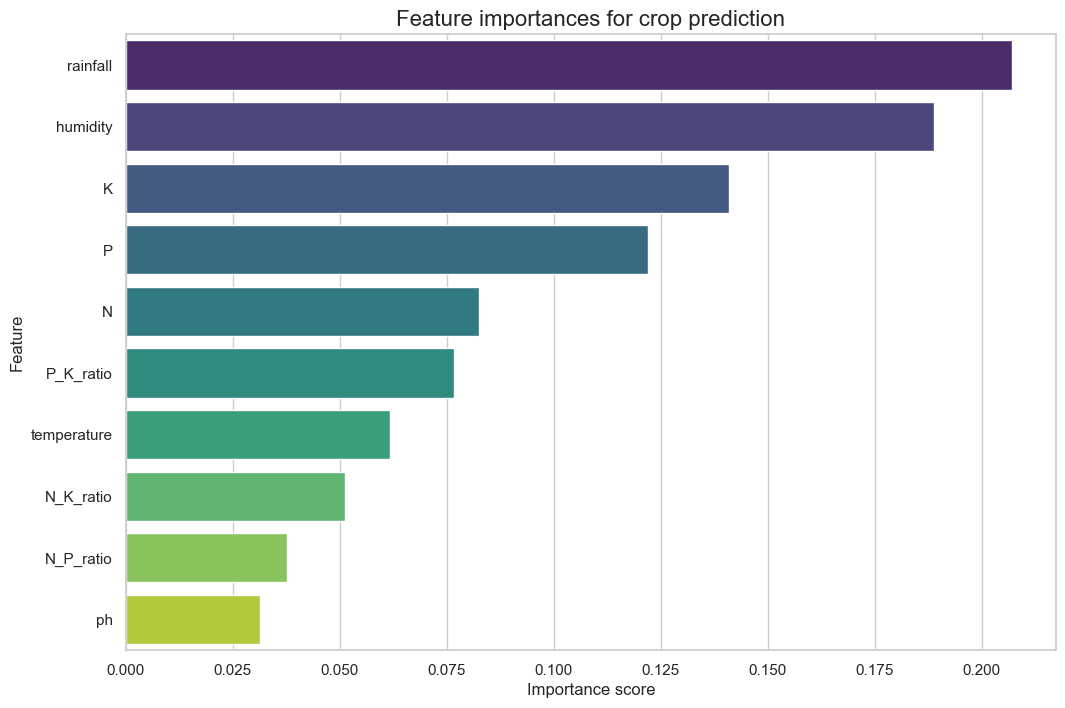

In [47]:
if data is not None:
    print("\n\n" + "="*80)
    print("STEP 10: MODEL INTERPRETABILITY (FEATURE IMPORTANCE)")
    print("="*80)

    # Retrieve the trained Random Forest model from the models dictionary
    rf_model = models["Random Forest"]
    
    # Extract feature importances
    feature_importances = rf_model.feature_importances_
    
    # Create a DataFrame for easy, sorted visualization
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print("--- Feature importances (most to least important) ---")
    print(importance_df)

    # Visualize importances for quick interpretation
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title("Feature importances for crop prediction", size=16)
    plt.xlabel("Importance score")
    plt.ylabel("Feature")
    plt.show()

## Model export

In [48]:
import pickle

#1. Retrieve the trained Random Forest model from the models dictionary
final_random_forest_model = models["Random Forest"]
print("Random Forest model retrieved from memory.")

#2. Save the model to a pickle file
try:
    with open('random_forest_model.pkl', 'wb') as file:
        pickle.dump(final_random_forest_model, file)
    print("Model saved to 'random_forest_model.pkl'.")
    
    # Save the scaler as well
    with open('scaler.pkl', 'wb') as file:
        pickle.dump(scaler, file)
    print("Scaler saved to 'scaler.pkl'.")
    
    # Save label encoder classes
    with open('label_encoder.pkl', 'wb') as file:
        pickle.dump(le.classes_, file)
    print("Label encoder saved to 'label_encoder.pkl'.")
    
except Exception as e:
    print(f"Error saving the model: {e}") 
    print("Ensure you have write permissions in the current directory.")

Random Forest model retrieved from memory.
Model saved to 'random_forest_model.pkl'.
Scaler saved to 'scaler.pkl'.
Label encoder saved to 'label_encoder.pkl'.
